<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time-shifts" data-toc-modified-id="Time-shifts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time-shifts</a></span></li><li><span><a href="#Rolling-windows" data-toc-modified-id="Rolling-windows-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Rolling windows</a></span></li></ul></div>

From the "Python Data Science Handbook" by Jake VanderPlas

Simple visualization of maplotlib subplots(and not only) with market data for the biggests companies with focus on working with Time Series.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
from pandas_datareader import data

In [28]:
google = data.DataReader('GOOG', start='2014', end='2019', data_source='yahoo')
google.head(2); google.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,555.263550,550.549194,554.125916,552.963501,3666400.0,552.963501
2014-01-03,554.856201,548.894958,553.897461,548.929749,3355000.0,548.929749


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-28,1055.560059,1033.099976,1049.619995,1037.079956,1414800.0,1037.079956
2018-12-31,1052.699951,1023.590027,1050.959961,1035.609985,1493300.0,1035.609985


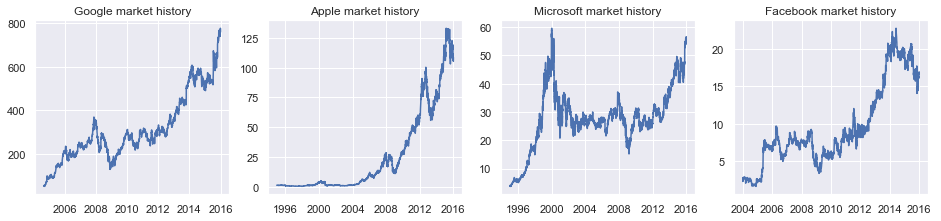

In [29]:
# IT companies market prices history
goog = data.DataReader('GOOG', start='1995', end='2016', data_source='yahoo')['Close']
apple = data.DataReader('AAPL', start='1995', end='2016', data_source='yahoo')['Close']
microsoft = data.DataReader('MSFT', start='1995', end='2016', data_source='yahoo')['Close']
facebook = data.DataReader('FC', start='2004', end='2016', data_source='yahoo')['Close']

# Subplots to show all results
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=plt.figaspect(0.2))
for ax, datas, names in zip(axes, [goog, apple, microsoft, facebook], ['Google', 'Apple', 'Microsoft', 'Facebook']):
    im = ax.plot(datas)
    ax.set(title=f'{names} market history')
    
plt.show();

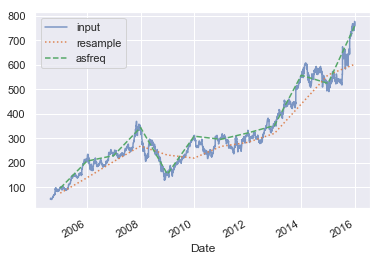

In [30]:
# learning difference between resample() and asfreq() methods - while down sampling - the
# latter one looks better
goog.plot(alpha=0.7, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

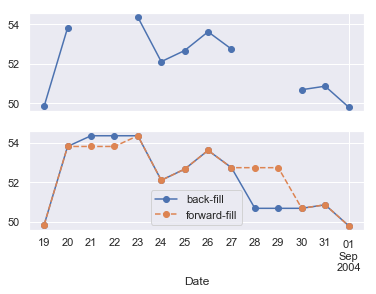

In [31]:
# the example shows how asfreq() refills NaN values(non-bisness days) using 2 opposite strategies
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['back-fill', 'forward-fill' ]);

#### Time-shifts

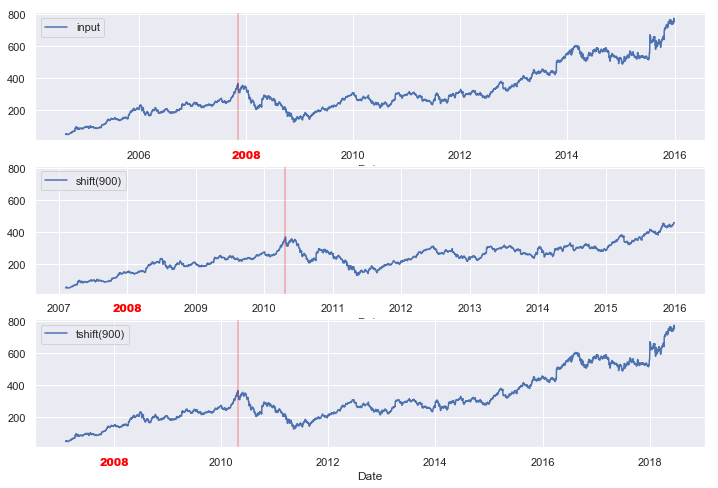

In [71]:
fig, ax = plt.subplots(3, sharey=True, figsize=[12,8] )
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])

# the difference between both methods is that shift() shifts the data, while tshift() shifts the index.
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max +offset, alpha=0.3, color='red');

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');


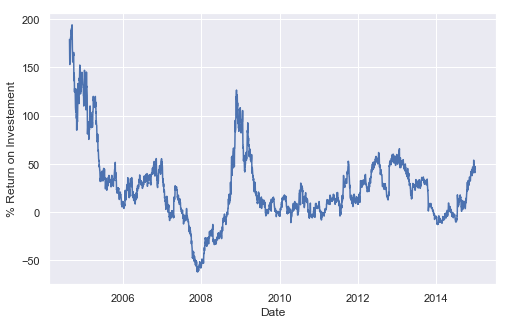

In [72]:
# A common context for using type of tshift is in computing differences over time
# Google trend in change of return on investment in comparison to the period of a year before
ROI = 100 * (goog.tshift(-365)/goog - 1)
ROI.plot(figsize=[8,5])
plt.ylabel('% Return on Investement');

#### Rolling windows

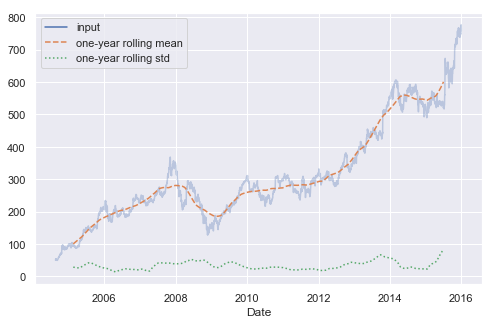

In [76]:
# for the given period (365) rolling() can count mean or std values (also max, min, etc)
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input':goog,
                    'one-year rolling mean': rolling.mean(),
                   'one-year rolling std': rolling.std()})
ax = data.plot(style=['-', '--', ':'], figsize=[8,5])
ax.lines[0].set_alpha(0.3);

In [7]:
fremont = './Data/Fremont_Bridge.csv'
f500 = './Data/f500.csv'

In [6]:
data = pd.read_csv(fremont, index_col=0, parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0
2019-04-30 20:00:00,58.0,91.0
2019-04-30 19:00:00,106.0,175.0


In [179]:
data = pd.read_csv(fremont, index_col='Date', parse_dates=True, verbose=True)
data.head()
data[data['Fremont Bridge East Sidewalk']==np.nan] = 0


Tokenization took: 31.20 ms
Type conversion took: 31.20 ms
Parser memory cleanup took: 0.00 ms


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0
2019-04-30 20:00:00,58.0,91.0
2019-04-30 19:00:00,106.0,175.0


In [8]:
data = pd.read_csv(f500, header=None, prefix='COL')
data.head()
m = data.columns

,COL0,COL1,COL2,COL3,COL4,COL5,COL6,COL7,COL8,COL9,...,COL13,COL14,COL15,COL16,COL17,COL18,COL19,COL20,COL21,COL22
0,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
1,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643,-7.2,198825,77798
2,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074,0,620854,283001
3,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687,-14.4,321686,128249
4,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840,-51.5,330314,167325


In [9]:
data1 = pd.read_csv(f500, usecols=['Rank', 'Title', 'Revenues'])
#data1.head()

In [10]:
data = pd.read_csv(f500, dtype={'Revenues':'float64'})
#data.info()

In [11]:
df = pd.read_csv(f500, skiprows=100)
df.head()

,100,Capital One Financial,http://www.capitalone.com,47300,Financials,Commercial Banks,"McLean, VA",1680 Capital One Dr.,McLean,VA,...,"Chairman, President & Chief Executive Officer","1680 Capital One Dr., McLean, VA 22102",COF,Capital One Financial Corporation,27519,9.6,3751,-7.4,357033,47514
0,101,Twenty-First Century Fox,http://www.21cf.com,21500,Media,Entertainment,"New York, NY",1211 Ave. of the Americas,New York,NY,...,Chief Executive Officer & Director,"1211 Ave. of the Americas, New York, NY 10036",FOXA,"Twenty-First Century Fox, Inc.",27326,-5.7,2755.0,-66.8,48365,13661.0
1,102,USAA,http://www.usaa.com,29943,Financials,Insurance: Property and Casualty (Stock),"San Antonio, TX",9800 Fredericksburg Rd.,San Antonio,TX,...,"President, Chief Executive Officer & Director","9800 Fredericksburg Rd., San Antonio, TX 78288",FOXA,United Services Automobile Association,27131,11.4,1779.1,-21.7,147290,28840.0
2,103,World Fuel Services,http://www.wfscorp.com,5000,Energy,Energy,"Miami, FL",9800 N.W. 41st St.,Miami,FL,...,"Chairman, President & Chief Executive Officer","9800 N.W. 41st St., Miami, FL 33178",INT,World Fuel Services Corporation,27016,-11.1,126.5,-27.5,5413,1925.0
3,104,Philip Morris International,http://www.pmi.com,79500,"Food, Beverages & Tobacco",Tobacco,"New York, NY",120 Park Ave.,New York,NY,...,Chief Executive Officer & Director,"120 Park Ave., New York, NY 10017",PM,Philip Morris International Inc.,26685,-0.4,6967.0,1.4,36851,-12688.0
4,105,Deere,http://www.johndeere.com,56767,Industrials,Construction and Farm Machinery,"Moline, IL",1 John Deere Place,Moline,IL,...,Chairman & Chief Executive Officer,"1 John Deere Place, Moline, IL 61265",DE,Deere & Company,26644,-7.7,1523.9,-21.4,57981,6520.0


In [12]:
pd.read_csv(f500, skiprows= lambda x: x%2==1)

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
1,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
2,6,UnitedHealth Group,http://www.unitedhealthgroup.com,230000,Health Care,Health Care: Insurance and Managed Care,"Minnetonka, MN",9900 Bren Rd. E.,Minnetonka,MN,...,Chief Executive Officer & Director,"9900 Bren Rd. E., Minnetonka, MN 55343",UNH,UnitedHealth Group Incorporated,184840,17.7,7017.0,20.7,122810,38274.0
3,8,General Motors,http://www.gm.com,225000,Motor Vehicles & Parts,Motor Vehicles and Parts,"Detroit, MI",300 Renaissance Center,Detroit,MI,...,Chairman & Chief Executive Officer,"300 Renaissance Center, Detroit, MI 48265",GM,General Motors Company,166380,9.2,9427.0,-2.7,221690,43836.0
4,10,Ford Motor,http://www.ford.com,201000,Motor Vehicles & Parts,Motor Vehicles and Parts,"Dearborn, MI",1 American Rd.,Dearborn,MI,...,"President, Chief Executive Officer & Director","1 American Rd., Dearborn, MI 48126",F,Ford Motor Company,151800,1.5,4596.0,-37.7,237951,29170.0
5,12,Amazon.com,http://www.amazon.com,341400,Technology,Internet Services and Retailing,"Seattle, WA",410 Terry Ave. N.,Seattle,WA,...,"Chairman, President & Chief Executive Officer","410 Terry Ave. N., Seattle, WA 98109",AMZN,"Amazon.com, Inc.",135987,27.1,2371.0,297.8,83402,19285.0
6,14,Verizon,http://www.verizon.com,160900,Telecommunications,Telecommunications,"New York, NY",1095 Ave. of the Americas,New York,NY,...,Chairman & Chief Executive Officer,"1095 Ave. of the Americas, New York, NY 10036",VZ,Verizon Communications Inc.,125980,-4.3,13127.0,-26.6,244180,22524.0
7,16,Costco,http://www.costco.com,172000,Retailing,General Merchandisers,"Issaquah, WA",999 Lake Dr.,Issaquah,WA,...,"President, Chief Executive Officer & Director","999 Lake Dr., Issaquah, WA 98027",COST,Costco Wholesale Corporation,118719,2.2,2350.0,-1.1,33163,12079.0
8,18,Kroger,http://www.thekrogerco.com,443000,Food & Drug Stores,Food and Drug Stores,"Cincinnati, OH",1014 Vine St.,Cincinnati,OH,...,Chairman & Chief Executive Officer,"1014 Vine St., Cincinnati, OH 45202",KR,The Kroger Company,115337,5.0,1975.0,-3.1,36505,6698.0
9,20,Fannie Mae,http://www.fanniemae.com,7000,Financials,Diversified Financials,"Washington, DC",3900 Wisconsin Ave. N.W.,Washington,DC,...,"President, Chief Executive Officer & Director","3900 Wisconsin Ave. N.W., Washington, DC 20016",FNMA,Fannie Mae,107162,-2.9,12313.0,12.4,3287968,6071.0


In [13]:
pd.read_csv(f500, nrows=2)

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643,-7.2,198825,77798
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074,0.0,620854,283001


In [14]:
df = pd.read_csv(f500, parse_dates=True, verbose=True)

Tokenization took: 0.00 ms
Type conversion took: 15.60 ms
Parser memory cleanup took: 0.00 ms


In [ ]:
maj = './Data/maj.csv'

In [252]:
df = pd.read_csv(maj, encoding='iso 8859-1', sep=';', header=None, prefix='Col', skiprows=[0], usecols=[0,1,2],
                 converters={2:lambda x: x.replace(',','.')}
                )
df.head(2)

,Col0,Col1,Col2
0,20190501,1,1037.900
1,20190501,2,869.948


In [259]:
df = pd.read_csv(maj, encoding='iso 8859-1', sep=';', header=None, prefix='Col', skiprows=[0], usecols=[0,1,2],
                 converters={2:lambda x: x.replace(',','.')}, parse_dates=[0], index_col=0)
df.head(2)
df.info()

,Col1,Col2
Col0,,
2019-05-01,1,1037.900
2019-05-01,2,869.948


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2019-05-01 to 2019-05-07
Data columns (total 2 columns):
Col1    168 non-null int64
Col2    168 non-null object
dtypes: int64(1), object(1)
memory usage: 3.3+ KB
